# Часть 1

## Нормальное распределение с несмещенной медианой

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Среднее: -0.003224104480494816
Медиана: -0.019281867729087427
Мода: -0.2748321947914367
Стандартное отклонение: 0.9487900525803334
P-value (тест Шапиро-Уилка): 0.4284626245498657
Данные соответствуют нормальному распределению (p-value > 0.05)


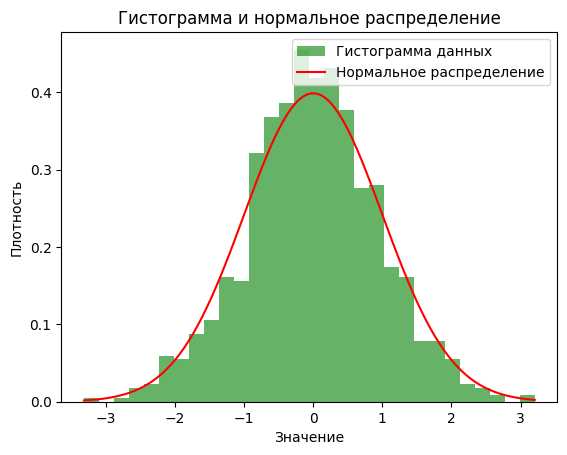

In [10]:
# Параметры нормального распределения
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение
size = 1000  # Количество генерируемых значений
data = np.random.normal(mean, std_dev, size)

mean_value = np.mean(data)  # Среднее
median_value = np.median(data)  # Медиана
std_dev_value = np.std(data)  # Стандартное отклонение

# Нахождение моды
hist, bin_edges = np.histogram(data, bins=30)
mode_value = bin_edges[np.argmax(hist)]

# Проверка на нормальное распределение (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(data)
p_value = shapiro_test.pvalue

print(f"Среднее: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Мода: {mode_value}")
print(f"Стандартное отклонение: {std_dev_value}")
print(f"P-value (тест Шапиро-Уилка): {p_value}")

if p_value > 0.05:
    print("Данные соответствуют нормальному распределению (p-value > 0.05)")
else:
    print("Данные не соответствуют нормальному распределению (p-value <= 0.05)")

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма данных')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mean, std_dev), 'r-', label='Нормальное распределение')
plt.title('Гистограмма и нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## Нормальное распределение со смещенной медианой

Среднее: 0.9939348004476387
Медиана: 0.9675430587082732
Мода: 0.7794849586940411
Стандартное отклонение: 1.428168299454371
P-value (тест Шапиро-Уилка): 4.000230910605751e-05
Данные не соответствуют нормальному распределению (p-value <= 0.05)


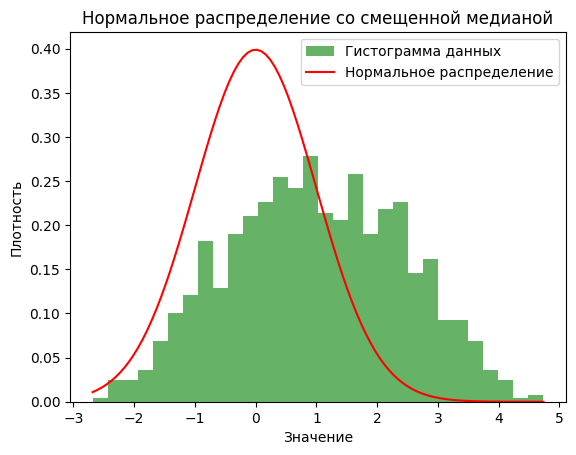

In [11]:
# Параметры нормального распределения
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение
size = 1000  # Количество генерируемых значений
shift = 2  # Смещение для части данных (чтобы медиана отличалась)

data = np.random.normal(mean, std_dev, size)

# Смещение медианы: добавляем смещение к половине данных
half_size = size // 2
data[:half_size] += shift  # Смещаем первую половину данных

# Вычисление статистик
mean_value = np.mean(data)  # Среднее
median_value = np.median(data)  # Медиана
std_dev_value = np.std(data)  # Стандартное отклонение

# Нахождение моды (используем гистограмму)
hist, bin_edges = np.histogram(data, bins=30)
mode_value = bin_edges[np.argmax(hist)] 

# Проверка на нормальное распределение (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(data)
p_value = shapiro_test.pvalue

print(f"Среднее: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Мода: {mode_value}")
print(f"Стандартное отклонение: {std_dev_value}")
print(f"P-value (тест Шапиро-Уилка): {p_value}")

if p_value > 0.05:
    print("Данные соответствуют нормальному распределению (p-value > 0.05)")
else:
    print("Данные не соответствуют нормальному распределению (p-value <= 0.05)")

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма данных')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mean, std_dev), 'r-', label='Нормальное распределение')
plt.title('Нормальное распределение со смещенной медианой')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## Равномерное распределение

Среднее: 4.888544881202566
Медиана: 4.6603878438818285
Мода: 0.019415927184326387
Стандартное отклонение: 2.9334430749911156
P-value (тест Колмогорова-Смирнова): 0.12726858671969943
Данные соответствуют равномерному распределению (p-value > 0.05)


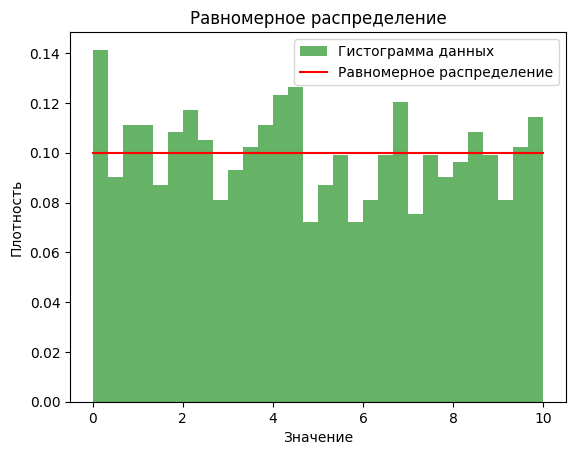

In [8]:
# Параметры равномерного распределения
low = 0  # Нижняя граница
high = 10  # Верхняя граница
size = 1000  # Количество генерируемых значений

data = np.random.uniform(low, high, size)

# Вычисление статистик
mean_value = np.mean(data)  # Среднее
median_value = np.median(data)  # Медиана
std_dev_value = np.std(data)  # Стандартное отклонение

# Нахождение моды (для равномерного распределения мода не определена)
# Используем гистограмму для нахождения наиболее частого интервала
hist, bin_edges = np.histogram(data, bins=30)
mode_value = bin_edges[np.argmax(hist)]  # Мода как середина интервала с наибольшим количеством данных

# Проверка на равномерное распределение (тест Колмогорова-Смирнова)
ks_test = stats.kstest(data, 'uniform', args=(low, high - low))
p_value = ks_test.pvalue

print(f"Среднее: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Мода: {mode_value}")
print(f"Стандартное отклонение: {std_dev_value}")
print(f"P-value (тест Колмогорова-Смирнова): {p_value}")

if p_value > 0.05:
    print("Данные соответствуют равномерному распределению (p-value > 0.05)")
else:
    print("Данные не соответствуют равномерному распределению (p-value <= 0.05)")

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма данных')
x = np.linspace(low, high, 100)
plt.plot(x, stats.uniform.pdf(x, low, high - low), 'r-', label='Равномерное распределение')
plt.title('Равномерное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()